<a href="https://colab.research.google.com/github/IMI1998/Time-Series-prophet-/blob/main/Time_Series(prophet)_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/AirPassengers.csv")
data

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
data.dtypes

,0
Month,object
AirPassengers,int64


In [ ]:
data['Month'] = pd.DatetimeIndex(data['Month'])
data.head()

,Month,AirPassengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


<Axes: xlabel='Month'>

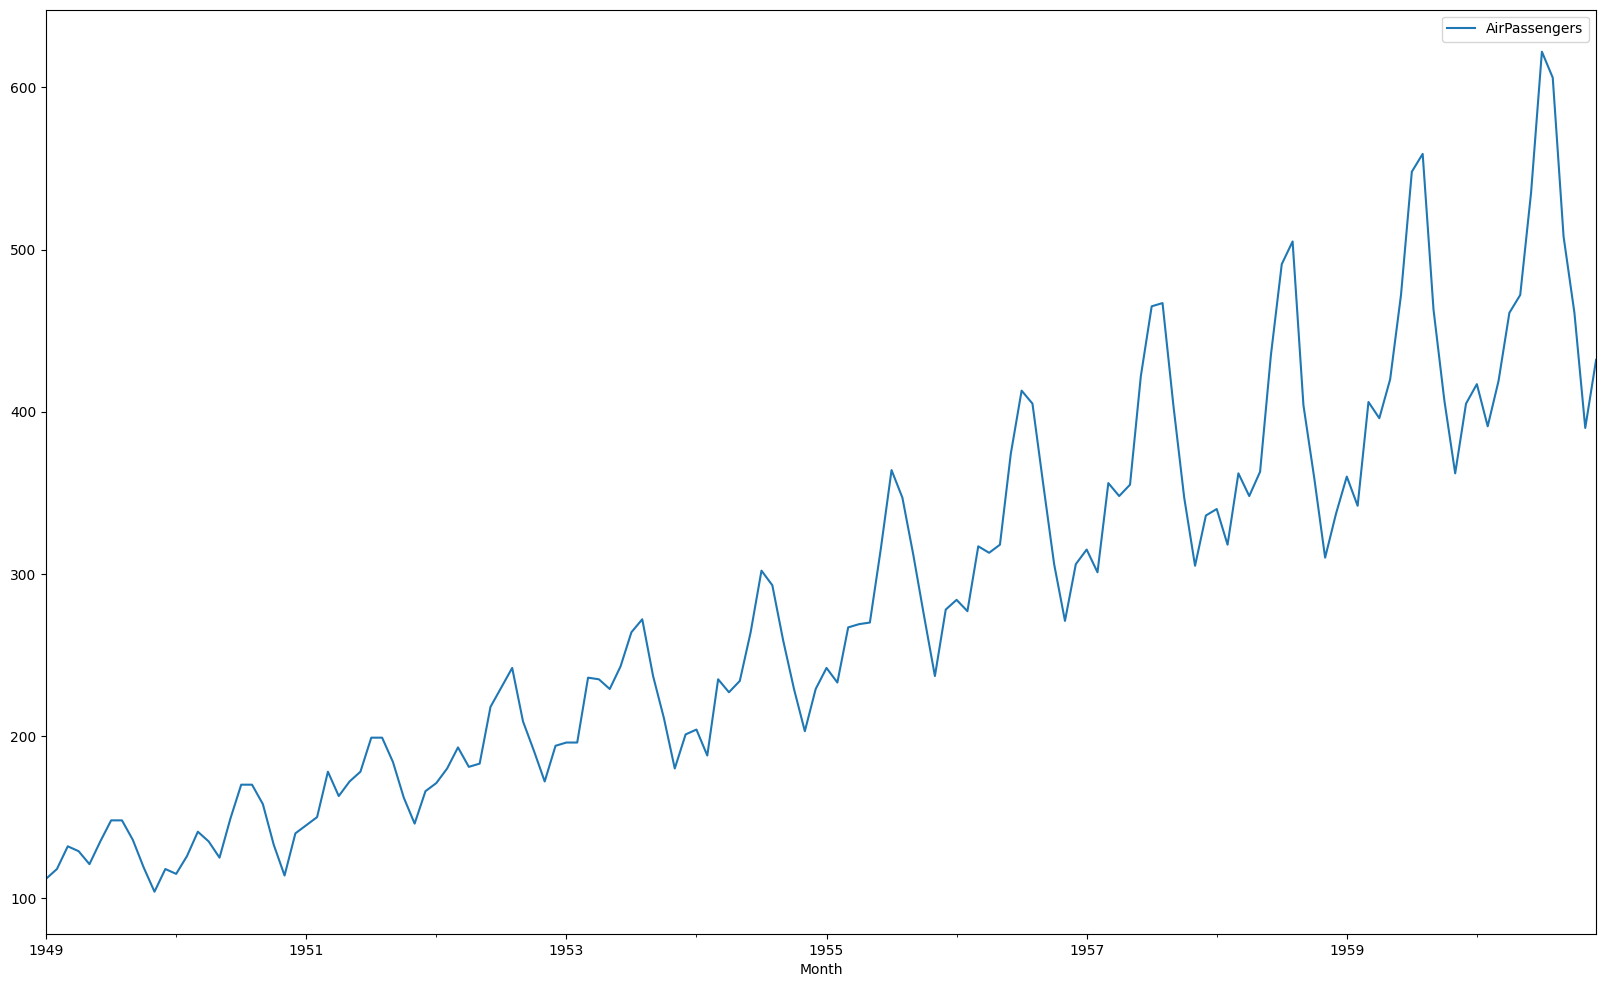

In [ ]:
data.set_index('Month').plot(figsize=(20,12))

In [ ]:
p = Prophet()
data=data.rename(columns={
    'Month' : 'ds',
    'AirPassengers' : 'y'
})
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
p.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_qxct7ax/hame95ha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_qxct7ax/p2qgmx31.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26424', 'data', 'file=/tmp/tmp_qxct7ax/hame95ha.json', 'init=/tmp/tmp_qxct7ax/p2qgmx31.json', 'output', 'file=/tmp/tmp_qxct7ax/prophet_modelcheye_8g/prophet_model-20240805112529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:25:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:25:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = p.make_future_dataframe(periods=36 , freq='MS')
future.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [ ]:
forecast = p.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,57.300502,114.949535,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,51.274339,110.709131,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,81.762909,139.733962,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,80.462733,134.665463,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,81.792476,141.171404,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1963-08-01,583.129515,622.626890,678.441154,580.286068,586.132232,67.604288,67.604288,67.604288,67.604288,67.604288,67.604288,0.0,0.0,0.0,650.733803
176,1963-09-01,586.261164,575.061106,633.847986,583.277174,589.402232,17.222424,17.222424,17.222424,17.222424,17.222424,17.222424,0.0,0.0,0.0,603.483588
177,1963-10-01,589.291792,536.523879,593.840660,586.185148,592.590362,-22.032179,-22.032179,-22.032179,-22.032179,-22.032179,-22.032179,0.0,0.0,0.0,567.259613
178,1963-11-01,592.423441,507.409579,565.674510,589.176394,595.862973,-56.983658,-56.983658,-56.983658,-56.983658,-56.983658,-56.983658,0.0,0.0,0.0,535.439784


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


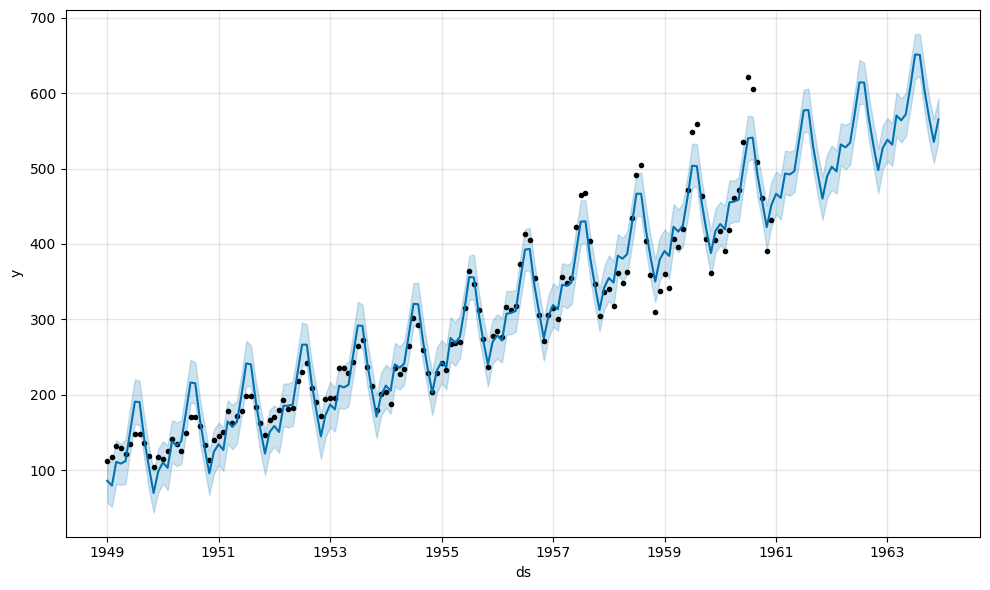

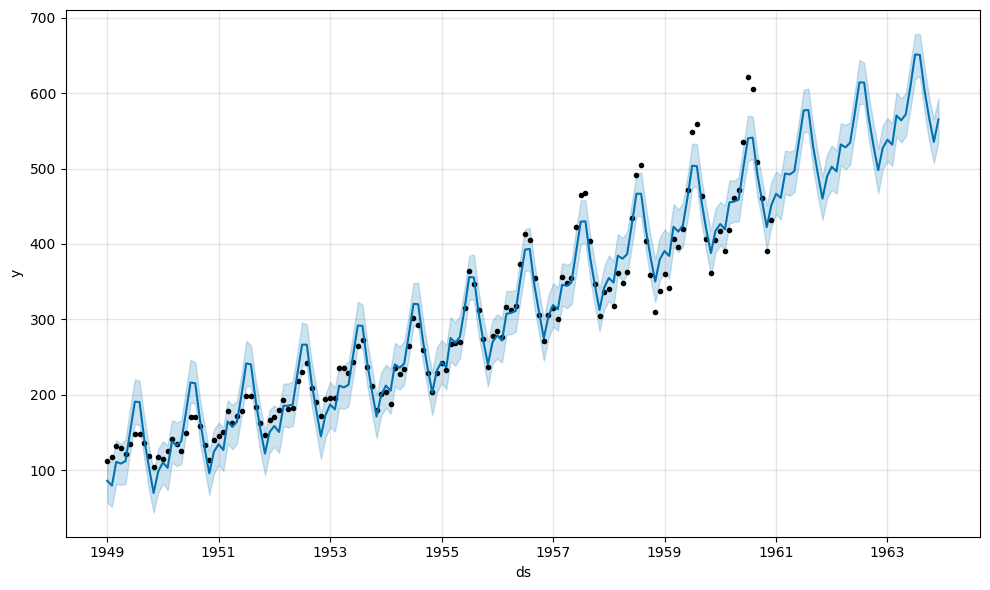

In [ ]:
p.plot(forecast , uncertainty=True)